<a href="https://colab.research.google.com/github/felladib/Cats-vs-Dogs-Classification-using-CNN/blob/main/catVSdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a "**Cat vs Dog**" project can be an exciting venture, whether it's for educational purposes or just for fun. Typically, a "Cat vs Dog" project involves creating a classification model that can distinguish between images of cats and dogs. Here's a simplified guide on how you can approach such a project:

**Data Collection**: Gather a large dataset of images containing cats and dogs. You can use online repositories or APIs like Flickr, or you can use pre-existing datasets such as the Cat vs Dog dataset available on Kaggle.

**Data Preprocessing**: Resize the images to a uniform size, convert them to grayscale, or perform other necessary preprocessing steps to standardize the data.

**Model Selection**: Choose a suitable machine learning model for your classification task. Convolutional Neural Networks (CNNs) are particularly effective for image classification tasks. You can use popular libraries like TensorFlow or PyTorch for this purpose.

**Model Training**: Split your data into training and testing sets. Train your chosen model on the training set, adjusting the hyperparameters as needed to improve performance. Regularization techniques like dropout and batch normalization can be employed to prevent overfitting.

**Model Evaluation**: Evaluate the trained model's performance on the testing set using metrics such as accuracy, precision, recall, and F1-score. This step helps you gauge how well the model can distinguish between cats and dogs.




In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"felladb","key":"ef42a10a3bfbf2e9e52b86ea65b6f0ca"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c dogs-vs-cats

 98% 796M/812M [00:03<00:00, 210MB/s]
100% 812M/812M [00:03<00:00, 234MB/s]


In [8]:
import zipfile

# Spécifiez le chemin vers votre fichier zip téléchargé
zip_path = "/content/dogs-vs-cats.zip"

# Spécifiez le chemin où vous souhaitez extraire les données
extract_path = "/content/dogs-vs-cats"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# !unzip \*.zip

In [ ]:
# !unzip train.zip
# !unzip dogs-vs-cats.zip
# !unzip test1.zip

In [9]:
# Afficher le contenu du répertoire extrait
extracted_files = os.listdir('/content/dogs-vs-cats')
print(extracted_files)

['train.zip', 'sampleSubmission.csv', 'test1.zip']


In [10]:
import zipfile

# Spécifiez le chemin vers le répertoire où les fichiers seront extraits
extract_path = "/content/dogs-vs-cats"

# Liste des fichiers à extraire
files_to_extract = ['train.zip', 'test1.zip']

# Extraction des fichiers zip
for file in files_to_extract:
    file_path = os.path.join('/content/dogs-vs-cats', file)
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

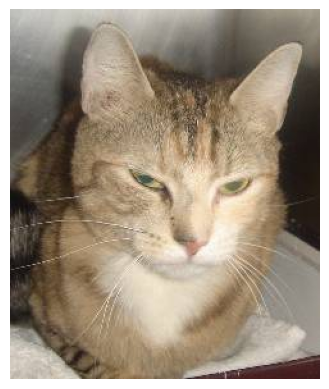

In [18]:
from PIL import Image
train_directory = '/content/dogs-vs-cats/train/'  # Pour les images d'entraînement
test_directory = '/content/dogs-vs-cats/test1/'  # Pour les images de test

# Choisissez un fichier image spécifique dans le répertoire de votre choix
# Par exemple, pour les images d'entraînement :
image_path = os.path.join(train_directory, os.listdir(train_directory)[0])

# Charger l'image à l'aide de PIL
image = Image.open(image_path)

# Afficher l'image
plt.imshow(image)
plt.axis('off')  # Masquer les axes
plt.show()


In [38]:
print(os.listdir(test_directory))

['6747.jpg', '2115.jpg', '12076.jpg', '3320.jpg', '3023.jpg', '7396.jpg', '5769.jpg', '1706.jpg', '11469.jpg', '2996.jpg', '1608.jpg', '11203.jpg', '7738.jpg', '5727.jpg', '5115.jpg', '1238.jpg', '8033.jpg', '2954.jpg', '4806.jpg', '3453.jpg', '907.jpg', '6085.jpg', '3436.jpg', '8048.jpg', '8319.jpg', '2504.jpg', '172.jpg', '6883.jpg', '12179.jpg', '8480.jpg', '3211.jpg', '9825.jpg', '7309.jpg', '4881.jpg', '1813.jpg', '606.jpg', '7749.jpg', '7143.jpg', '4019.jpg', '3250.jpg', '10327.jpg', '12114.jpg', '4057.jpg', '4324.jpg', '5526.jpg', '1607.jpg', '8535.jpg', '4660.jpg', '8987.jpg', '1365.jpg', '2095.jpg', '2964.jpg', '1897.jpg', '9292.jpg', '6197.jpg', '9308.jpg', '8766.jpg', '1142.jpg', '3500.jpg', '5098.jpg', '2077.jpg', '4600.jpg', '1597.jpg', '9430.jpg', '1776.jpg', '4689.jpg', '1901.jpg', '2058.jpg', '7812.jpg', '5451.jpg', '9463.jpg', '4342.jpg', '1567.jpg', '6454.jpg', '10508.jpg', '420.jpg', '12056.jpg', '6218.jpg', '2264.jpg', '5706.jpg', '11671.jpg', '11716.jpg', '9598.jpg

In [19]:
# voir les propré de l'image :


# Charger l'image
img = Image.open('/content/dogs-vs-cats/train/cat.0.jpg')

# Afficher les propriétés de l'image
print("Type d'image :", img.format)
print("Mode de l'image :", img.mode)
print("Taille de l'image :", img.size)

Type d'image : JPEG
Mode de l'image : RGB
Taille de l'image : (500, 374)


In [20]:
# En redimensionnant toutes les images à une taille standard, vous assurez que toutes vos données d'entrée ont la même forme.
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3 #rvb(rouge,vert, bleu)

In [23]:
ls -l

total 831640
drwxr-xr-x 3 root root      4096 Nov  2 13:13 chemin/
drwxr-xr-x 4 root root      4096 Nov  2 13:27 dogs-vs-cats/
-rw-r--r-- 1 root root 851576689 Dec 11  2019 dogs-vs-cats.zip
-rw-r--r-- 1 root root        63 Nov  2 13:12 kaggle.json
drwxr-xr-x 1 root root      4096 Oct 31 13:22 sample_data/


In [12]:
filenames = os.listdir("/content/dogs-vs-cats/train/")
filenames_test = os.listdir("/content/dogs-vs-cats/test1/")

In [13]:
# perparer les données.
# sachant que les nom des image sont comme ca par exemple : dod.9657 donc on doit mettre 1 dans la case categorie
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})


In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout

class CatVSDog(tf.keras.Model):
    def __init__(self, filter_size, Image_Width, Image_Height, Image_Channels, l2=0, dropout_val=0.0):
        super(CatVSDog, self).__init__()

        self.conv_layers = []
        self.norm_layers = []
        self.pool_layers = []
        self.dropout_layers = []

        for i in range(3):
            self.conv_layers.append(Conv2D(filter_size * 2**i, (3, 3), activation='relu'))
            self.norm_layers.append(BatchNormalization())
            self.pool_layers.append(MaxPooling2D(pool_size=(2, 2)))
            self.dropout_layers.append(Dropout(dropout_val))

        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(l2), activation='relu')
        self.dropout = Dropout(dropout_val*2)
        self.dense2 = tf.keras.layers.Dense(2, activation='softmax', name='output')

    def call(self, inputs):
        x = inputs

        for i in range(3):
            x = self.conv_layers[i](x)
            x = self.norm_layers[i](x)
            x = self.pool_layers[i](x)
            x = self.dropout_layers[i](x)

        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dropout(x)

        return self.dense2(x)



In [21]:
model=CatVSDog(16,Image_Width, Image_Height, Image_Channels,1e-6,0.25)

In [22]:
from keras import metrics
rmse = metrics.RootMeanSquaredError()
precision = metrics.Precision()

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy',rmse , precision])

In [23]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience = 10) #  C'est un rappel qui permet d'arrêter l'entraînement prématurément si certaines conditions sont remplies

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
# monitor: C'est la métrique surveillée pour déclencher la réduction du taux d'apprentissage ('val_acc' dans cet exemple, pour la précision sur les données de validation).
# patience: Le nombre d'époques sans amélioration après lesquelles le taux d'apprentissage sera réduit.
# factor: Le facteur de réduction du taux d'apprentissage. Le nouveau taux d'apprentissage devient learning_rate * factor.
# min_lr: La valeur minimale que le taux d'apprentissage peut atteindre. Une fois que le taux d'apprentissage atteint cette valeur, il ne sera plus réduit.
callbacks = [earlystop,learning_rate_reduction]

In [24]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})


train_df,validate_df = train_test_split(df,test_size=0.20,  random_state=42)
# pour diviser un DataFrame df en ensembles d'entraînement et de validation

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
# Cela réinitialise l'index du DataFrame train_df après la division, en remplaçant l'index existant par un nouvel index numérique. L'argument drop=True évite la création d'une nouvelle colonne à partir de l'index précédent


total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [ ]:
# train_df
dt

In [25]:
# pour augmenter les données d'entraînement
train_datagen = ImageDataGenerator(rotation_range=15,  # les images peuvent être tournées jusqu'à 15 degrés
                                rescale=1./255, #C'est une valeur pour redimensionner l'intensité des pixels
                                shear_range=0.1, #Spécifie le degré de cisaillement(tchwih XD)
                                zoom_range=0.2, #permet un zoom aléatoire allant jusqu'à 20%.
                                horizontal_flip=True, #Permet les retournements horizontaux aléatoires des images. Cela signifie que certaines images peuvent être retournées horizontalement.
                                width_shift_range=0.1,
                                height_shift_range=0.1 # signifie que l'image peut être déplacée horizontalement jusqu'à 10% de sa largeur.
                                )
# La fonction flow_from_dataframe permet de charger et de générer des batches d'images à partir d'un DataFrame donné
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "/content/dogs-vs-cats/train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size, #Définit la taille à laquelle les images seront redimensionnées lors de la lecture
                                                 class_mode='categorical', # Indique que les étiquettes sont catégoriques, ce qui signifie que chaque image est associée à une catégorie spécifique.
                                                 batch_size=batch_size)



Found 20000 validated image filenames belonging to 2 classes.


In [26]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                              "./dogs-vs-cats/train/",
                                                              x_col='filename',
                                                              y_col='category',
                                                              target_size=Image_Size,
                                                              class_mode='categorical',
                                                              batch_size=batch_size
)


Found 5000 validated image filenames belonging to 2 classes.


In [27]:
epochs=10
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

<ipython-input-27-0303d50756ed>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
1333/1333 [==============================] - ETA: 0s - loss: 0.9233 - accuracy: 0.6059 - root_mean_squared_error: 0.4987 - precision: 0.6059

1333/1333 [==============================] - 127s 91ms/step - loss: 0.9233 - accuracy: 0.6059 - root_mean_squared_error: 0.4987 - precision: 0.6059 - val_loss: 0.7769 - val_accuracy: 0.6875 - val_root_mean_squared_error: 0.4804 - val_precision: 0.6875 - lr: 0.0010
Epoch 2/10
1333/1333 [==============================] - ETA: 0s - loss: 0.6515 - accuracy: 0.6639 - root_mean_squared_error: 0.4655 - precision: 0.6639

1333/1333 [==============================] - 119s 89ms/step - loss: 0.6515 - accuracy: 0.6639 - root_mean_squared_error: 0.4655 - precision: 0.6639 - val_loss: 0.6361 - val_accuracy: 0.6256 - val_root_mean_squared_error: 0.4714 - val_precision: 0.6256 - lr: 0.0010
Epoch 3/10
1333/1333 [==============================] - ETA: 0s - loss: 0.6381 - accuracy: 0.6921 - root_mean_squared_error: 0.4541 - precision: 0.6921

1333/1333 [==============================] - 118s 88ms/step - loss: 0.6381 - accuracy: 0.6921 - root_mean_squared_error: 0.4541 - precision: 0.6921 - val_loss: 1.0933 - val_accuracy: 0.6797 - val_root_mean_squared_error: 0.5001 - val_precision: 0.6797 - lr: 0.0010
Epoch 4/10
1333/1333 [==============================] - ETA: 0s - loss: 0.6050 - accuracy: 0.7068 - root_mean_squared_error: 0.4424 - precision: 0.7068

1333/1333 [==============================] - 119s 89ms/step - loss: 0.6050 - accuracy: 0.7068 - root_mean_squared_error: 0.4424 - precision: 0.7068 - val_loss: 0.5507 - val_accuracy: 0.7353 - val_root_mean_squared_error: 0.4202 - val_precision: 0.7353 - lr: 0.0010
Epoch 5/10
1333/1333 [==============================] - ETA: 0s - loss: 0.5737 - accuracy: 0.7282 - root_mean_squared_error: 0.4301 - precision: 0.7282

1333/1333 [==============================] - 123s 92ms/step - loss: 0.5737 - accuracy: 0.7282 - root_mean_squared_error: 0.4301 - precision: 0.7282 - val_loss: 0.8557 - val_accuracy: 0.5796 - val_root_mean_squared_error: 0.5297 - val_precision: 0.5796 - lr: 0.0010
Epoch 6/10
1331/1333 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7364 - root_mean_squared_error: 0.4213 - precision: 0.7364

1333/1333 [==============================] - 119s 89ms/step - loss: 0.5564 - accuracy: 0.7365 - root_mean_squared_error: 0.4212 - precision: 0.7365 - val_loss: 1.1700 - val_accuracy: 0.6727 - val_root_mean_squared_error: 0.4920 - val_precision: 0.6727 - lr: 0.0010
Epoch 7/10
1333/1333 [==============================] - ETA: 0s - loss: 0.5358 - accuracy: 0.7512 - root_mean_squared_error: 0.4124 - precision: 0.7512

1333/1333 [==============================] - 118s 89ms/step - loss: 0.5358 - accuracy: 0.7512 - root_mean_squared_error: 0.4124 - precision: 0.7512 - val_loss: 0.5111 - val_accuracy: 0.7738 - val_root_mean_squared_error: 0.3984 - val_precision: 0.7738 - lr: 0.0010
Epoch 8/10
1333/1333 [==============================] - ETA: 0s - loss: 0.5348 - accuracy: 0.7499 - root_mean_squared_error: 0.4107 - precision: 0.7499

1333/1333 [==============================] - 119s 89ms/step - loss: 0.5348 - accuracy: 0.7499 - root_mean_squared_error: 0.4107 - precision: 0.7499 - val_loss: 0.5492 - val_accuracy: 0.7431 - val_root_mean_squared_error: 0.4132 - val_precision: 0.7431 - lr: 0.0010
Epoch 9/10
1333/1333 [==============================] - ETA: 0s - loss: 0.5238 - accuracy: 0.7542 - root_mean_squared_error: 0.4070 - precision: 0.7542

1333/1333 [==============================] - 121s 91ms/step - loss: 0.5238 - accuracy: 0.7542 - root_mean_squared_error: 0.4070 - precision: 0.7542 - val_loss: 1.0946 - val_accuracy: 0.6216 - val_root_mean_squared_error: 0.5313 - val_precision: 0.6216 - lr: 0.0010
Epoch 10/10
1331/1333 [============================>.] - ETA: 0s - loss: 0.5129 - accuracy: 0.7673 - root_mean_squared_error: 0.4012 - precision: 0.7673

1333/1333 [==============================] - 119s 89ms/step - loss: 0.5129 - accuracy: 0.7674 - root_mean_squared_error: 0.4012 - precision: 0.7674 - val_loss: 0.6463 - val_accuracy: 0.7712 - val_root_mean_squared_error: 0.4015 - val_precision: 0.7712 - lr: 0.0010


In [31]:
model.save("model_catsVSdogs", save_format='tf')

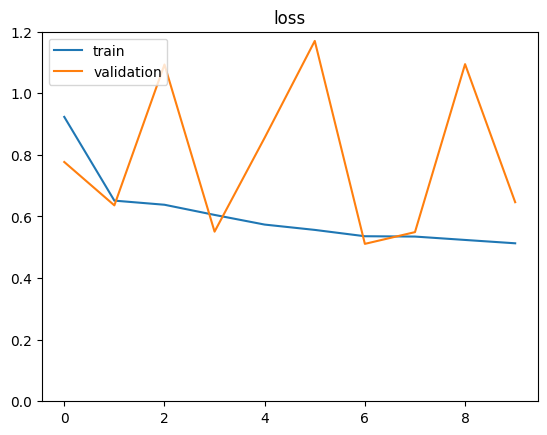

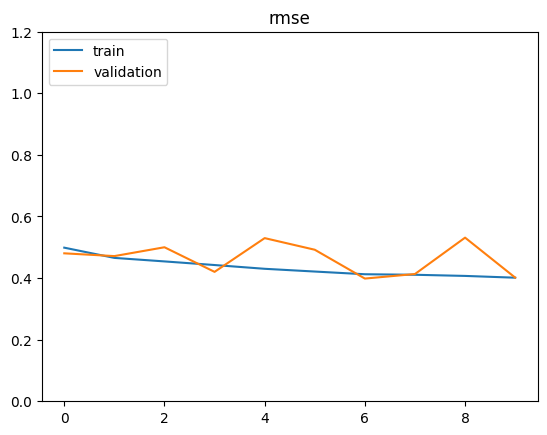

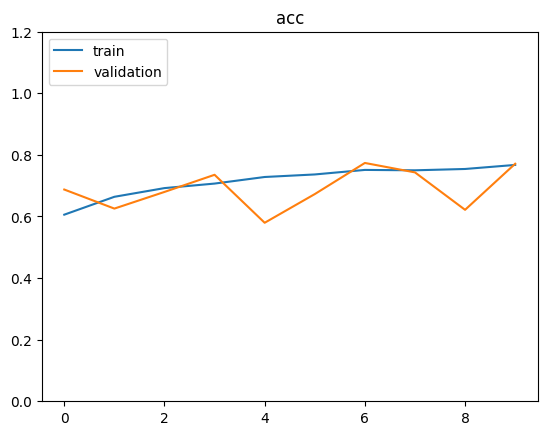

In [30]:
import matplotlib.pyplot as plt
loss_curve= history.history["loss"]
acc_curve = history.history["accuracy"]
rmse_curve= history.history["root_mean_squared_error"]


loss_val = history.history["val_loss"]
acc_val  = history.history["val_accuracy"]
rmse_val = history.history["val_root_mean_squared_error"]


# ploter loss function
def ploter(title , curve , valid):
  plt.plot(curve , label = "train")
  plt.plot(valid , label = "validation")
  plt.legend(loc='upper left')
  plt.title(title)
  plt.ylim(0,1.2)
  plt.show()

ploter('loss' , loss_curve , loss_val)
ploter('rmse' , rmse_curve , rmse_val)

ploter('acc' , acc_curve , acc_val)

In [41]:
# ca marche pas car l'ensemble des données de test sont non etiqueté
test_datagen = ImageDataGenerator(
    rescale=1./255,
    # Autres prétraitements nécessaires pour les données de test
)

test_generator = test_datagen.flow_from_directory(
    './dogs-vs-cats/test1',  # Le chemin vers le répertoire de test
    target_size=(128, 128),  # La taille cible des images
    batch_size=batch_size,  # La taille du batch
    class_mode='categorical',  # Le mode de classe pour les catégories
    shuffle=False  # Pour ne pas mélanger les données
)

Found 0 images belonging to 0 classes.


In [46]:
image_directory = './dogs-vs-cats/test1/'
image_filenames = os.listdir(image_directory)

batch_size = 32  # Taille du batch
predictions = []  # Liste pour stocker les prédictions

# Parcourir toutes les images par lots et les prédire
for i in range(0, len(image_filenames), batch_size):
    batch_images = []  # Liste pour stocker les images du batch

    # Charger et prétraiter les images dans le batch
    for filename in image_filenames[i:i + batch_size]:
        img_path = os.path.join(image_directory, filename)  # Chemin vers l'image
        img = image.load_img(img_path, target_size=(128, 128))  # Charger l'image
        img = image.img_to_array(img)  # Convertir l'image en tableau Numpy
        img = np.expand_dims(img, axis=0)  # Ajouter une dimension pour former un batch
        batch_images.append(img)

    # Concaténer toutes les images pour former un seul batch
    batch_images = np.concatenate(batch_images, axis=0)

    # Prédire les sorties pour les images du batch
    batch_predictions = model.predict(batch_images)
    predictions.extend(batch_predictions)  # Ajouter les prédictions à la liste

# Maintenant, 'predictions' contient les prédictions pour toutes les images



1/1 [==============================] - 0s 19ms/step


In [ ]:
import matplotlib.pyplot as plt
import os

# Supposons que vous avez déjà chargé et prédit les images comme mentionné précédemment

image_directory = './dogs-vs-cats/test1/'
image_filenames = os.listdir(image_directory)

# Dictionnaire pour convertir les indices de classe en noms de classe
class_names = {0: 'cat', 1: 'dog'}  # À adapter selon vos classes

# Afficher les images avec les prédictions
for i in range(len(image_filenames)):
    img_path = os.path.join(image_directory, image_filenames[i])  # Chemin vers l'image
    img = plt.imread(img_path)  # Charger l'image

    plt.imshow(img)
    predicted_class = np.argmax(predictions[i])  # Récupérer la classe prédite
    predicted_label = class_names[predicted_class]  # Convertir l'indice de classe en nom de classe
    plt.title(f'Predicted: {predicted_label}')  # Afficher la classe prédite comme titre

    plt.show()  # Afficher l'image avec la prédiction


In [47]:
predicted_cats = 0
predicted_dogs = 0

for prediction in predictions:
    predicted_class = np.argmax(prediction)  # Indice de la classe prédite
    if predicted_class == 0:  # Supposons que 0 représente la classe "cat"
        predicted_cats += 1
    else:
        predicted_dogs += 1

print(f"Nombre d'images prédites comme chat : {predicted_cats}")
print(f"Nombre d'images prédites comme chien : {predicted_dogs}")


Nombre d'images prédites comme chat : 11472
Nombre d'images prédites comme chien : 1028


# Cats VS Dogs Classifier GUI:

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

from keras.models import load_model
model = tf.keras.models.load_model('model_catsVSdogs')
#dictionary to label all traffic signs class.
classes = {
    0:'its a cat',
    1:'its a dog',

}
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('CatsVSDogs Classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((128,128))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    image = image/255
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign)
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),
   padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="CatsVSDogs Classification",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()